In [321]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import math as m
import pandas as pd
import seaborn as sns

## Reading the data

In [322]:
df = pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that there aren't data with null statements, so there is no need to transform it. But it is visible that there are tabs in column names, so it would be better to rename it for sufficient use in future.

In [324]:
df = df.rename(columns={'age': 'age',
                         ' workclass': 'workclass',
                         ' fnlwgt': 'final_weight',
                         ' education': 'education',
                         ' education-num': 'education_num',
                         ' marital-status': 'marital_status',
                         ' occupation': 'occupation',
                         ' relationship': 'relationship',
                         ' race': 'race',
                         ' sex': 'sex',
                         ' capital-gain': 'capital_gain',
                         ' capital-loss': 'capital_loss',
                         ' hours-per-week': 'hrs_per_week',
                         ' native-country': 'native_country',
                         ' income': 'income'
                        })
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

Since 'income' is our target variable, it's better to make it numerical for easier computation. I will create a new variable derived from the 'income' - 'income_encoded'.

In [325]:
df['income_encoded'] = [True if value == ' >50K' else False for value in df['income'].values]
df['income_encoded'].unique()
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [326]:
df.sample(2)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income,income_encoded
4457,31,State-gov,93589,HS-grad,9,Divorced,Protective-serv,Own-child,Other,Male,0,0,40,United-States,<=50K,False
14632,20,Local-gov,247794,Assoc-voc,11,Never-married,Adm-clerical,Own-child,White,Female,0,0,35,United-States,<=50K,False


## Analysing data

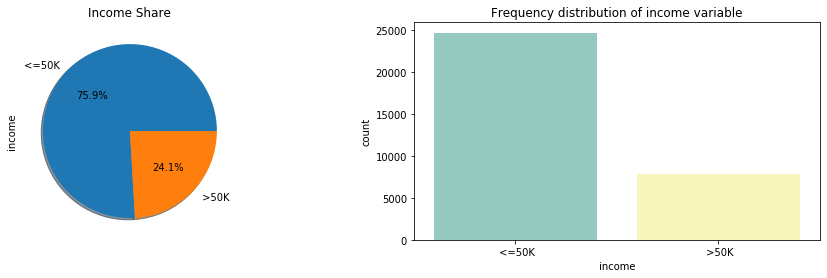

In [327]:
f,ax = plt.subplots(1,2,figsize=(16,4))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')
ax[1] = sns.countplot(x="income", data=df, palette="Set3")
ax[1].set_title("Frequency distribution of income variable")
plt.show()

### Plotting numeric data

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


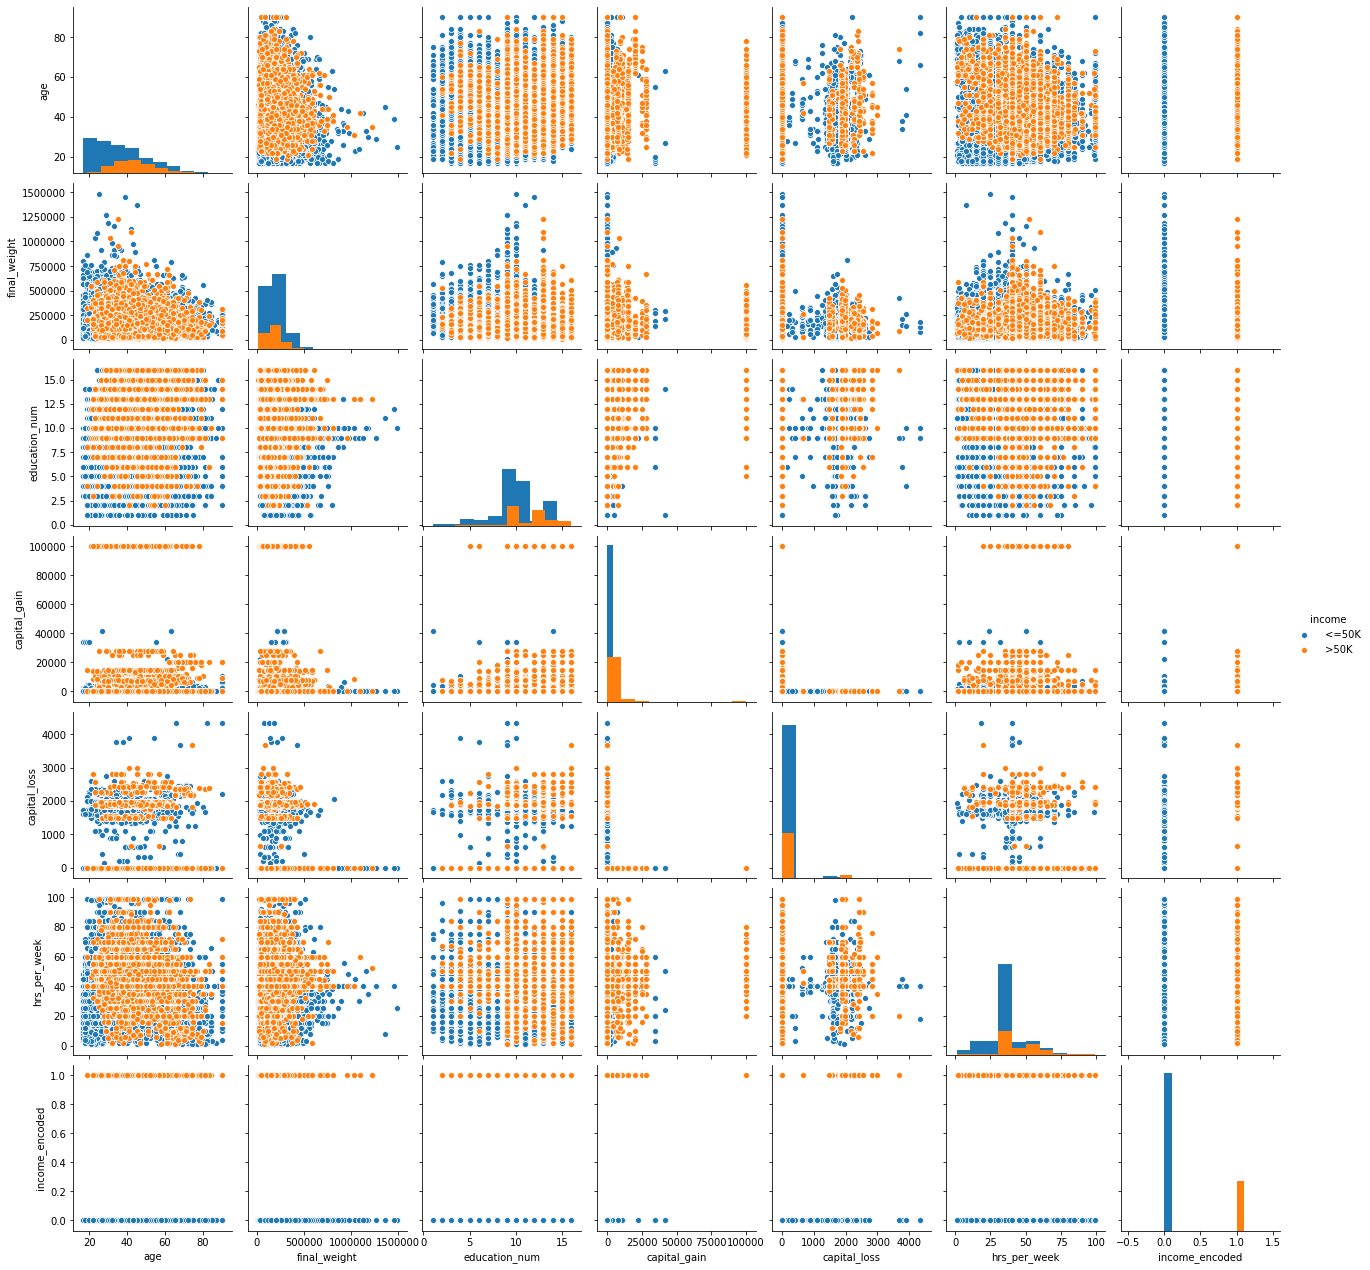

In [328]:
sns.pairplot(df, hue="income", diag_kind='hist')
plt.show()

### Discovering categorical data

We can discover sexism in this data!!!

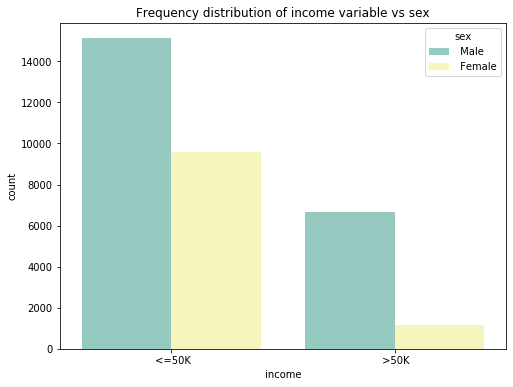

In [329]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set3")
ax.set_title("Frequency distribution of income variable vs sex")
plt.show()

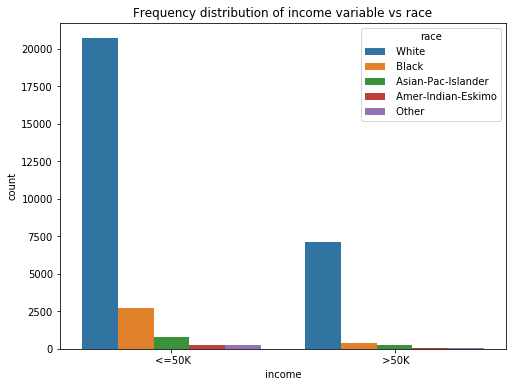

In [330]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="race", data=df)
ax.set_title("Frequency distribution of income variable vs race")
plt.show()

We can see, that most people are white in both categories of incomes, that's why I was interested in race distribution at all.  

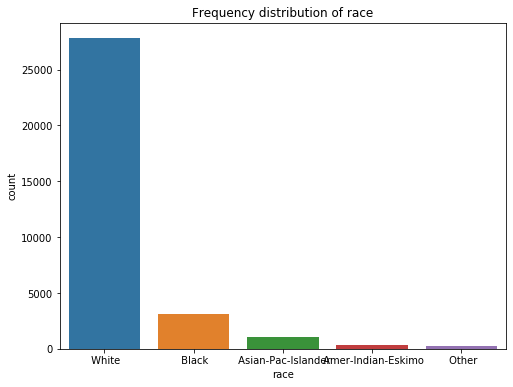

In [331]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="race", data=df)
ax.set_title("Frequency distribution of race")
plt.show()

As we can see now, the reason of shown above results is that the distribution of white people in this dataset is much bigger than other races.

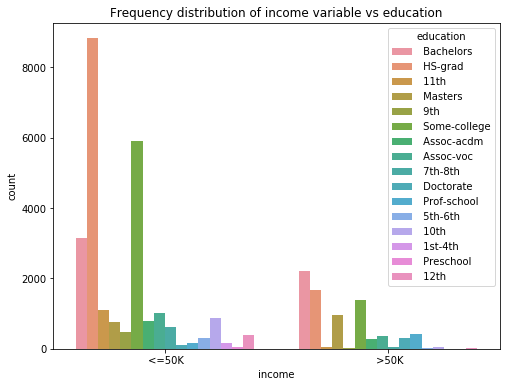

In [332]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="education", data=df)
ax.set_title("Frequency distribution of income variable vs education")
plt.show()

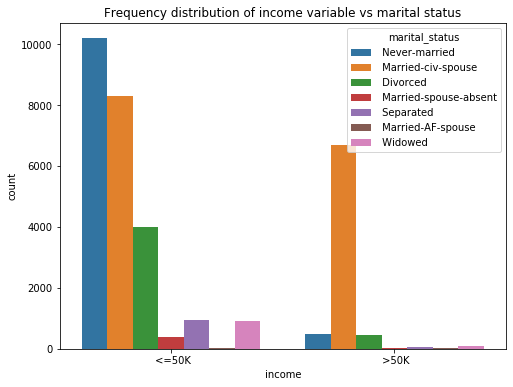

In [333]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="marital_status", data=df)
ax.set_title("Frequency distribution of income variable vs marital status")
plt.show()

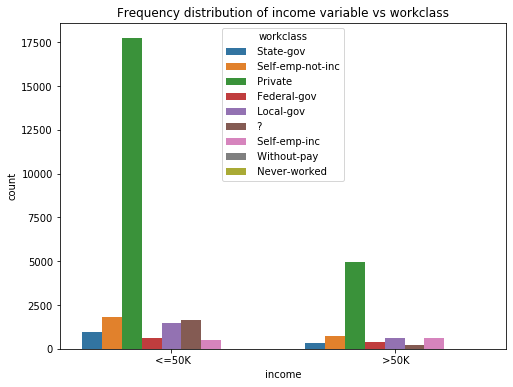

In [334]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="workclass", data=df)
ax.set_title("Frequency distribution of income variable vs workclass")
plt.show()

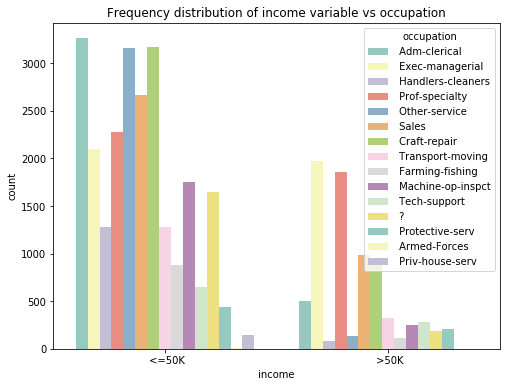

In [335]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="occupation", data=df, palette="Set3")
ax.set_title("Frequency distribution of income variable vs occupation")
plt.show()

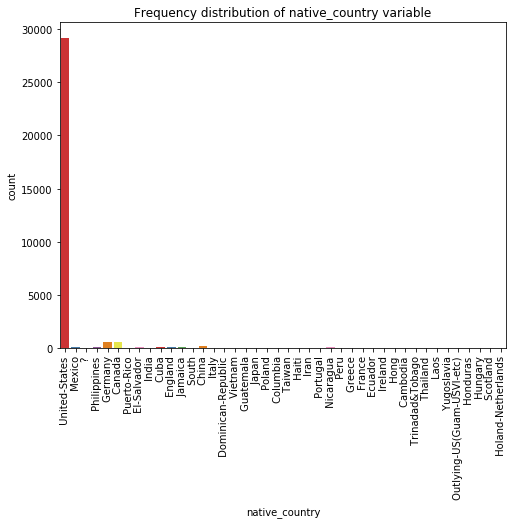

In [336]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="native_country", data=df, palette="Set1")
ax.set_title("Frequency distribution of native_country variable")
ax.set_xticklabels(df.native_country.value_counts().index, rotation=90)
plt.show()

### Corelation between different features

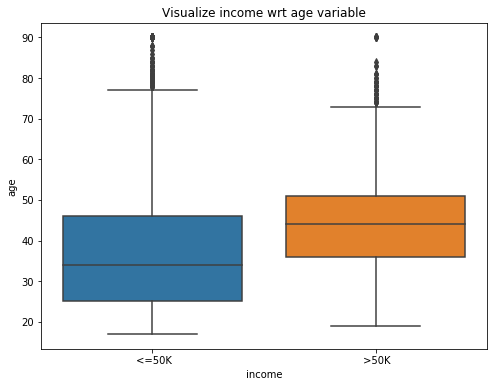

In [337]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

<Figure size 432x288 with 0 Axes>

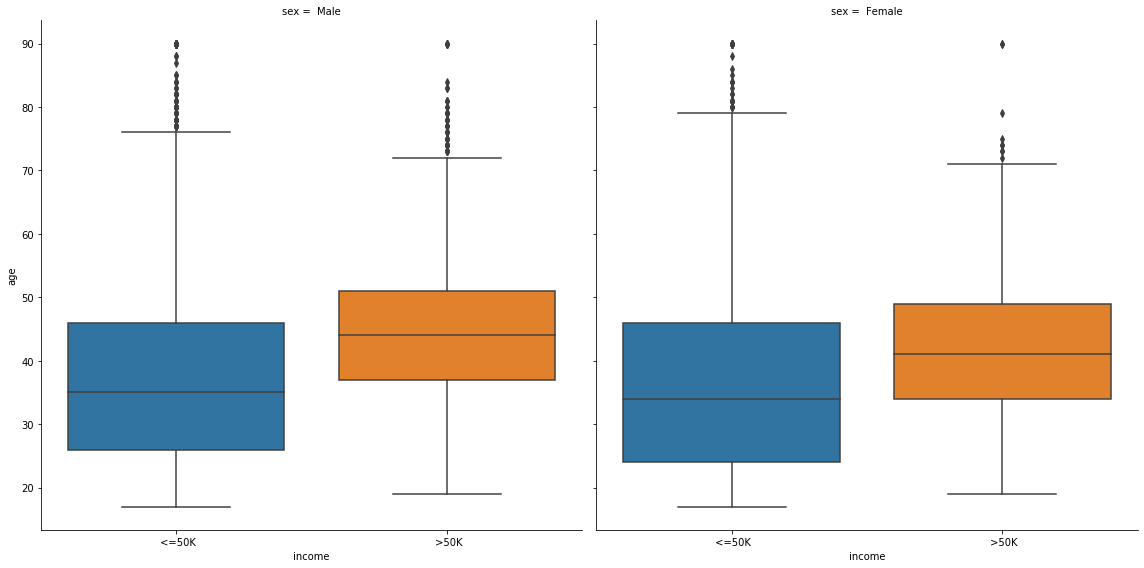

In [338]:
plt.figure(figsize=(6,4))
ax = sns.catplot(x="income", y="age", col="sex", data=df, kind="box", height=8, aspect=1)
plt.show()

From these graphics we can see that older people make more many in both sex categories.

## Prepearing data 

As we have seen from graph above, the corelation of country isn't important, because most of data participants are Us native. That's why I decided to drop it from the model.

In [339]:
y = df['income_encoded']
y = y.astype('bool')
X = df.drop(columns=['income', 'income_encoded', 'education_num', 'final_weight', 'native_country'])
X.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40


In [340]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560     True
Name: income_encoded, Length: 32561, dtype: bool

We are making sure that every column of dataframe is of either numerical, categorical, or boolean datatypes. This will allow us to pass the data through a transformation pipeline.

In [341]:
from sklearn.preprocessing import label_binarize

def correct_dtypes(data):
    cat_cols=data.select_dtypes('object').columns.values
    data[cat_cols]=data[cat_cols].astype('category')
    #data['sex'] = [True if value == 'Female' else False for value in data['sex'].values]
    data['sex']=data['sex'].map({'Female':0,'Male':1}).astype('bool')
    data['sex'] = data['sex'].astype('bool')
    data=data.rename(columns={'sex':'female'})
    return data

X = correct_dtypes(X)
X.head()

,age,workclass,education,marital_status,occupation,relationship,race,female,capital_gain,capital_loss,hrs_per_week
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,True,2174,0,40
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,13
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,True,0,0,40
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,True,0,0,40
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,True,0,0,40


In [342]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20)

In [343]:
X_train.shape, X_test.shape

((26048, 11), (6513, 11))

## Data Transformation Pipeline

In [344]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

data, eval_data, target, eval_target = train_test_split(X,y,test_size=.20)

class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])
    

In [345]:
class StringIndexer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.apply(lambda s: s.cat.codes.replace(
            {-1: len(s.cat.categories)}
        ))

In [346]:
transformer = Pipeline([
    ('features', FeatureUnion(n_jobs=1, transformer_list=[
        # Part 1
        ('boolean', Pipeline([
            ('selector', TypeSelector('bool')),
        ])),  # booleans close
        
        ('numericals', Pipeline([
            ('selector', TypeSelector(np.number)),
            ('imputer',SimpleImputer()),
            ('scaler', StandardScaler()),
            
        ])),  # numericals close
        
        # Part 2
        ('categoricals', Pipeline([
            ('selector', TypeSelector('category')),
            ('labeler', StringIndexer()),
            ('encoder', OneHotEncoder()),
        ]))  # categoricals close
    ])),  # features close
])  # pipeline close

In [347]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

estimators=[
    ('logistic',LogisticRegression(solver='liblinear',penalty='l2')),
    ('lasso',LogisticRegression(solver='liblinear',penalty='l1')),
    ('ridge',RidgeClassifier()),
    ('elasticnet',SGDClassifier(loss='log', penalty='elasticnet')),
    #('decision_tree',DecisionTreeClassifier()),
    ('random_forest',RandomForestClassifier()),
    #('xgb',XGBClassifier(ojective='reg:logistic')),
    ('svc',LinearSVC()),
    ('deep_nn',MLPClassifier()),
    ('knn',KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto'))
]

pipes={}
for model in estimators:
    pipe=Pipeline(steps=[('data_prep',transformer),model])
    #pipe.fit(data,target)
    pipe.fit(X_train,y_train)
    pipes[pipe.steps[1][0]]=pipe

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [348]:
from sklearn.model_selection import KFold,cross_validate
from sklearn.metrics import make_scorer, f1_score, accuracy_score,roc_auc_score,log_loss

_metrics={'f1':make_scorer(f1_score),'auc':make_scorer(roc_auc_score),
         'accuracy':'accuracy','logloss':make_scorer(log_loss)}

estimator_names=[model[0] for model in estimators]

def plot_estimators(estimators=estimator_names,n_splits=5,metrics=['f1','auc','accuracy','logloss']):
    metrics={key : _metrics[key] for key in metrics}
    scorers=[]
    labels=[]
    for pipe_name in pipes.keys():
        if pipe_name in estimators:
            pipe=pipes[pipe_name]
            labels.append(pipe_name)
            kf=KFold(n_splits)
            #model_score=cross_validate(pipe,data, target,scoring=metrics,cv=kf)
            model_score=cross_validate(pipe,X_train, y_train,scoring=metrics,cv=kf)
            scorers.append(model_score)
    
    score_lists={}
    for metric in metrics:
        score_lists[metric]=[score['test_'+metric] for score in scorers]
    
    for  i,(title, _list) in enumerate(score_lists.items()):
        plt.figure(i)
        plot=sns.boxplot(data=_list).set_xticklabels(labels, rotation=45)
        plt.title(title)

In [349]:
metrics={'f1':make_scorer(f1_score),'auc':make_scorer(roc_auc_score),
         'accuracy':'accuracy','logloss':make_scorer(log_loss)}

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Ver

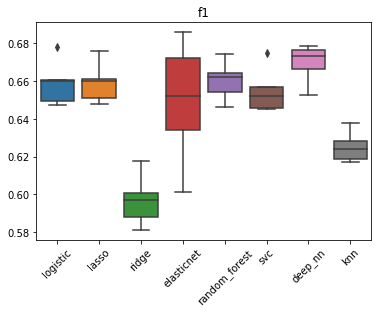

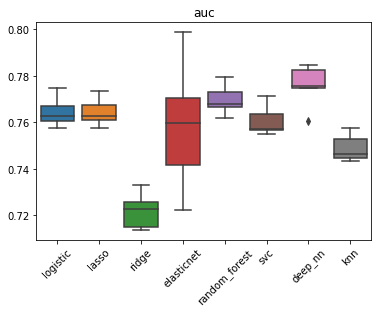

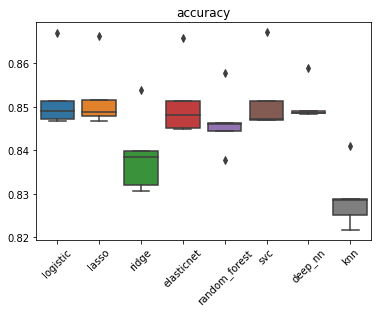

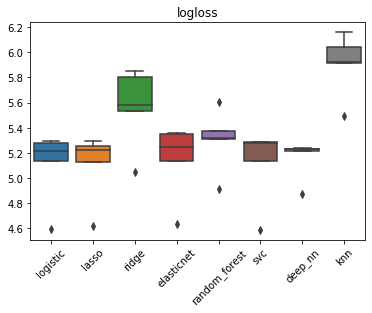

In [350]:
plot_estimators()

## Hyperparameter tuning

In [351]:
from sklearn.model_selection import GridSearchCV

def tune_param(model,param_grid,refit='auc',chart=None,data=data,target=target,cv=5):
    
    param_grid={model+'__'+key : param_grid[key] for key in param_grid.keys()}

    xgbcv=GridSearchCV(pipes[model],param_grid,scoring=metrics,refit=refit,cv=cv)
    xgbcv.fit(data,target)

    print('best score: '+str(xgbcv.best_score_))
    print('best params: '+str(xgbcv.best_params_))
    results=pd.DataFrame(xgbcv.cv_results_)
    
    if 'line' in chart:
        for i,param in enumerate(param_grid.keys()):
            graph_data=results[['param_'+param,'mean_test_'+refit,'mean_train_'+refit]]
            graph_data=graph_data.rename(columns={'mean_test_'+refit:'test','mean_train_'+refit:'train'})
            graph_data=graph_data.melt('param_'+param, var_name='type',value_name=refit)
            plt.figure(i)
            plot=sns.lineplot(x='param_'+param,y=refit,hue='type',data=graph_data)
            
    if 'heatmap' in chart:
        assert len(param_grid) == 2,  'heatmap only works with 2 params, {} passed'.format(str(len(param_grid)))
        
        param1=list(param_grid.keys())[0]
        param2=list(param_grid.keys())[1]

        graph_data=results[['param_'+param1,'param_'+param2,'mean_test_'+refit]]
        graph_data=graph_data.pivot(index='param_'+param1,columns='param_'+param2,values='mean_test_'+refit)
        sns.heatmap(graph_data,annot=True,xticklabels=True,yticklabels=True).set(xlabel=param2,ylabel=param1)

In [352]:
pipes['logistic'].named_steps['logistic'].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [353]:
pipes['lasso'].named_steps['lasso'].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

best score: 0.7665094110666437
best params: {'logistic__C': 1000, 'logistic__tol': 0.001}


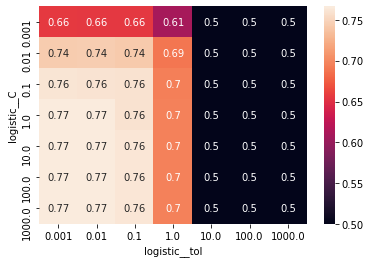

In [354]:
param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
           'tol':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
tune_param('logistic',param_grid,chart ='heatmap')

In [355]:
pipes['logistic'].set_params(**{'logistic__C': 1000, 'logistic__tol': 0.001})
pipes['lasso'].set_params(**{'lasso__C': 1000, 'lasso__tol': 0.001})

Pipeline(memory=None,
         steps=[('data_prep',
                 Pipeline(memory=None,
                          steps=[('features',
                                  FeatureUnion(n_jobs=1,
                                               transformer_list=[('boolean',
                                                                  Pipeline(memory=None,
                                                                           steps=[('selector',
                                                                                   TypeSelector(dtype='bool'))],
                                                                           verbose=False)),
                                                                 ('numericals',
                                                                  Pipeline(memory=None,
                                                                           steps=[('selector',
                                                                              

In [356]:
pipes['svc'].set_params(**{'svc__C': 1})

Pipeline(memory=None,
         steps=[('data_prep',
                 Pipeline(memory=None,
                          steps=[('features',
                                  FeatureUnion(n_jobs=1,
                                               transformer_list=[('boolean',
                                                                  Pipeline(memory=None,
                                                                           steps=[('selector',
                                                                                   TypeSelector(dtype='bool'))],
                                                                           verbose=False)),
                                                                 ('numericals',
                                                                  Pipeline(memory=None,
                                                                           steps=[('selector',
                                                                              

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Ver

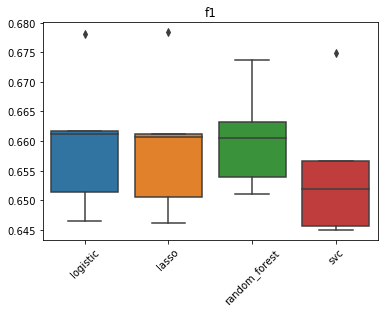

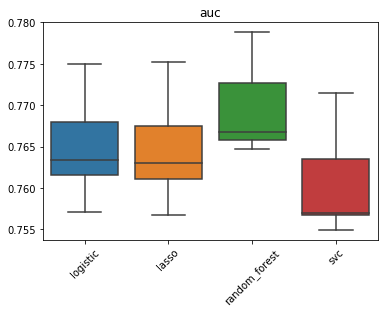

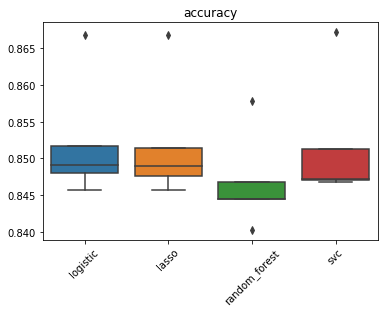

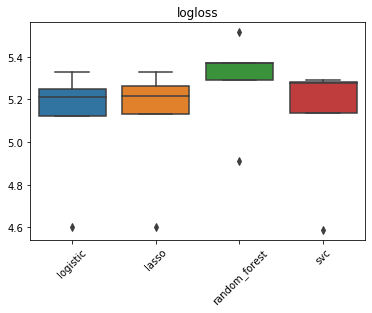

In [357]:
plot_estimators(['xgb','svc','logistic','lasso','random_forest'])